In [175]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor #случайный лес
from sklearn.ensemble import StackingRegressor #стекинг
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [176]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [178]:
del data['Id']
del data['Alley']
del data['PoolQC']
del data['MiscFeature']
del data['MiscVal']
del data['Fence']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [179]:
# переведем категориальные признаки через dummies
dict_types = dict(data.dtypes)
b = dict_types['MSZoning']

In [180]:
list_columns = []
for k,v in dict_types.items():
    if v == b:
        list_columns.append(k)

In [181]:
data_dummies = pd.get_dummies(data, columns = list_columns)
list(data_dummies.columns.values)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 275 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(239)
memory usage: 751.5 KB


In [182]:
data_dummies = data_dummies.dropna()
y = data_dummies['SalePrice']
del data_dummies['SalePrice']
X = data_dummies

In [183]:
#проверим через дерево решений важность фичей
model = DecisionTreeRegressor()

In [184]:
model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [185]:
features = pd.DataFrame(sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1], reverse=True))

In [186]:
features.head(15)

,0,1
0,OverallQual,0.645662
1,GrLivArea,0.086780
2,2ndFlrSF,0.068116
3,TotalBsmtSF,0.021970
4,BsmtFinSF1,0.018754
5,YearBuilt,0.014942
6,GarageCars,0.014257
7,LotArea,0.009940
8,GarageArea,0.008641
9,1stFlrSF,0.008326


In [187]:
#в итоговый датасет возьмем только те фичи, у которых важность имеет порядок в 2 знака после запятой.
total_features = features.head(7)
feat = list(total_features[0])
feat.append('SalePrice')

In [188]:
data_model = data.filter(items = feat)
data_model

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,YearBuilt,GarageCars,SalePrice
0,7,1710,854,856,706,2003,2,208500
1,6,1262,0,1262,978,1976,2,181500
2,7,1786,866,920,486,2001,2,223500
3,7,1717,756,756,216,1915,3,140000
4,8,2198,1053,1145,655,2000,3,250000
...,...,...,...,...,...,...,...,...
1455,6,1647,694,953,0,1999,2,175000
1456,6,2073,0,1542,790,1978,2,210000
1457,7,2340,1152,1152,275,1941,1,266500
1458,5,1078,0,1078,49,1950,1,142125


In [189]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   2ndFlrSF     1460 non-null   int64
 3   TotalBsmtSF  1460 non-null   int64
 4   BsmtFinSF1   1460 non-null   int64
 5   YearBuilt    1460 non-null   int64
 6   GarageCars   1460 non-null   int64
 7   SalePrice    1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


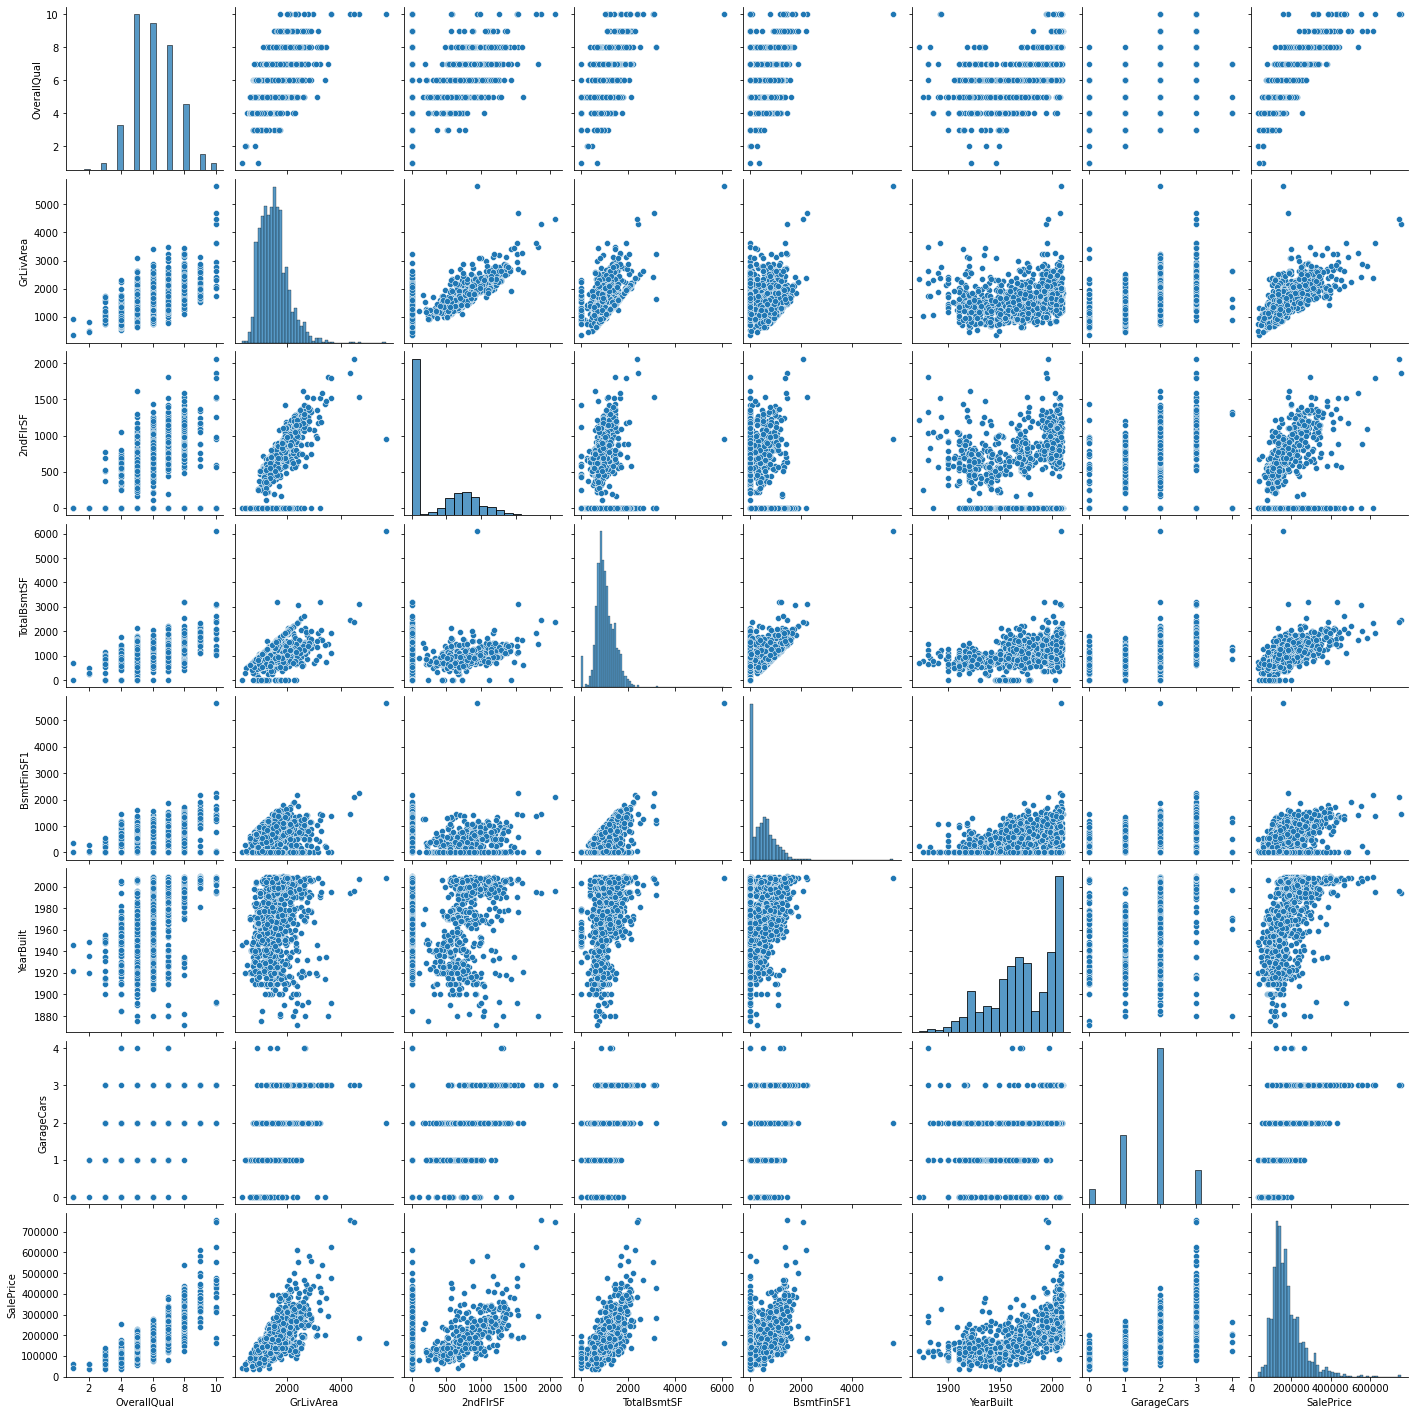

In [190]:
sns.pairplot(data_model)

In [191]:
y = data_model['SalePrice']
del data_model['SalePrice']
X = data_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,YearBuilt,GarageCars
892,6,1068,0,1059,663,1963,1
1105,8,2622,1122,1463,1032,1994,2
413,5,1028,0,1008,0,1927,2
522,6,1664,660,1004,399,1947,2
1036,9,1620,0,1620,1022,2007,3
...,...,...,...,...,...,...,...
331,5,1056,0,1056,846,1958,1
323,3,1163,0,1162,256,1955,1
650,7,1665,843,813,0,2007,2
439,6,1196,512,684,0,1920,2


In [192]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-0.09351293, -0.86910167, -0.80229406, ...,  0.47161658,
        -0.26014081, -1.07306249],
       [ 1.36557431,  2.05904031,  1.74244818, ...,  1.27423353,
         0.74852168,  0.29606343],
       [-0.82305655, -0.94447212, -0.80229406, ..., -0.9704838 ,
        -1.4314908 ,  0.29606343],
       ...,
       [ 0.63603069,  0.25580229,  1.10966468, ..., -0.9704838 ,
         1.17150918,  0.29606343],
       [-0.09351293, -0.62791623,  0.35894304, ..., -0.9704838 ,
        -1.6592533 ,  0.29606343],
       [ 2.09511793,  3.03508763,  1.86038632, ..., -0.9704838 ,
         1.20404668,  1.66518936]])

In [193]:
# строим случайный лес
reg_rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [194]:
reg_rf.score(X_train, y_train)

0.8195378566237991

In [195]:
reg_rf.score(X_test, y_test)

0.81907854885009

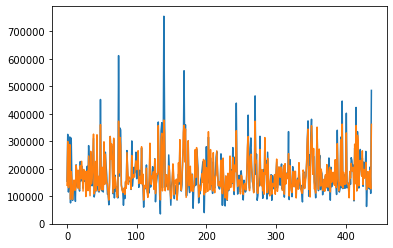

In [196]:
plt.plot(pd.DataFrame(zip(y_test, reg_rf.predict(X_test)), columns = ['y_test', 'pred']))

In [197]:
#важность признаков
imp = pd.DataFrame(sorted(zip(X, reg_rf.feature_importances_), key=lambda x: x[1], reverse=False), columns = ['name','importance'])
imp

,name,importance
0,2ndFlrSF,0.020580
1,YearBuilt,0.044649
2,BsmtFinSF1,0.055565
3,TotalBsmtSF,0.107586
4,GarageCars,0.131686
5,GrLivArea,0.196158
6,OverallQual,0.443775


<BarContainer object of 7 artists>

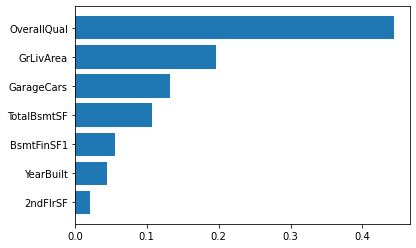

In [198]:
plt.barh(imp['name'],imp['importance'])

In [199]:
#строим стекинг (дерево решений и линейная регрессия)
regressor1 = StackingRegressor(
    [
        ('lr', LinearRegression()),
        ('dt', DecisionTreeRegressor())
    ],
LinearRegression())

In [200]:
regressor1.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('lr',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('dt',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.

LinearRegression: 0.8049426026162158


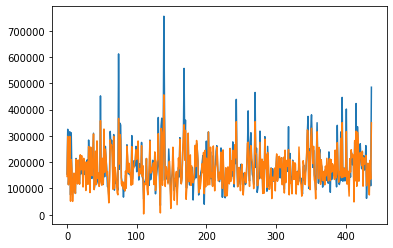

In [201]:
lr_score1 = regressor1.named_estimators_['lr'].score(X_test, y_test)
lr_predict1 = regressor1.named_estimators_['lr'].predict(X_test)
print('LinearRegression:',lr_score1)
plt.plot(pd.DataFrame(zip(y_test, lr_predict1), columns = ['y_test', 'pred']))

DecisionTree: 0.8267104205319326


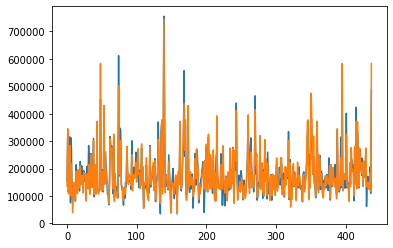

In [202]:
dt_score1 = regressor1.named_estimators_['dt'].score(X_test, y_test)
dt_predict1 = regressor1.named_estimators_['dt'].predict(X_test)
print('DecisionTree:',dt_score1)
plt.plot(pd.DataFrame(zip(y_test, dt_predict1), columns = ['y_test', 'pred']))

STACK1: 0.8569818906791169


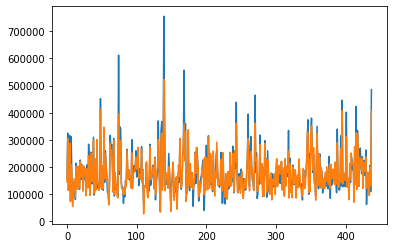

In [203]:
st_score1 = regressor1.score(X_test, y_test)
st_predict1 = regressor1.predict(X_test)
print('STACK1:',st_score1)
plt.plot(pd.DataFrame(zip(y_test, st_predict1), columns = ['y_test', 'pred']))

In [204]:
#строим стекинг (соседи и дерево)
regressor2 = StackingRegressor(
    [
        ('kn', KNeighborsRegressor()),
        ('dt', DecisionTreeRegressor())
    ],
KNeighborsRegressor())

In [205]:
regressor2.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('kn',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                              ('dt',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                  

KNeighbors: 0.8476456311382232


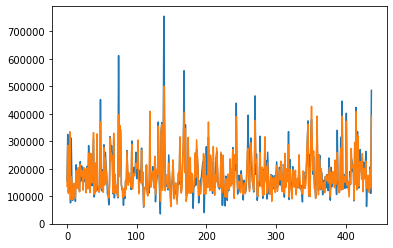

In [206]:
kn_score2 = regressor2.named_estimators_['kn'].score(X_test, y_test)
kn_predict2 = regressor2.named_estimators_['kn'].predict(X_test)
print('KNeighbors:',kn_score2)
plt.plot(pd.DataFrame(zip(y_test, kn_predict2), columns = ['y_test', 'pred']))

DecisionTree: 0.8238577370122292


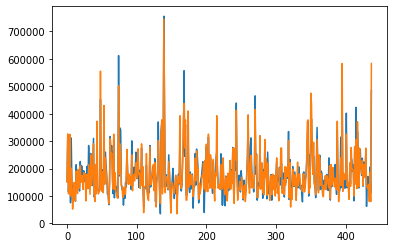

In [207]:
dt_score2 = regressor2.named_estimators_['dt'].score(X_test, y_test)
dt_predict2 = regressor2.named_estimators_['dt'].predict(X_test)
print('DecisionTree:',dt_score2)
plt.plot(pd.DataFrame(zip(y_test, dt_predict2), columns = ['y_test', 'pred']))

STACK2: 0.8214329086054606


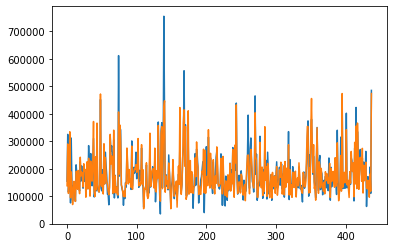

In [208]:
st_score2 = regressor2.score(X_test, y_test)
st_predict2 = regressor2.predict(X_test)
print('STACK2:',st_score2)
plt.plot(pd.DataFrame(zip(y_test, st_predict2), columns = ['y_test', 'pred']))

In [209]:
# стекинг из леса и соседей
regressor3 = StackingRegressor(
    [
        ('rf', RandomForestRegressor()),
        ('kn', KNeighborsRegressor())
    ],
KNeighborsRegressor())

In [210]:
regressor3.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('rf',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     

RandomForest: 0.8940865634030235


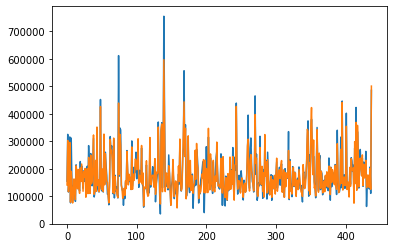

In [211]:
rf_score3 = regressor3.named_estimators_['rf'].score(X_test, y_test)
rf_predict3 = regressor3.named_estimators_['rf'].predict(X_test)
print('RandomForest:',rf_score3)
plt.plot(pd.DataFrame(zip(y_test, rf_predict3), columns = ['y_test', 'pred']))

DecisionTree: 0.8476456311382232


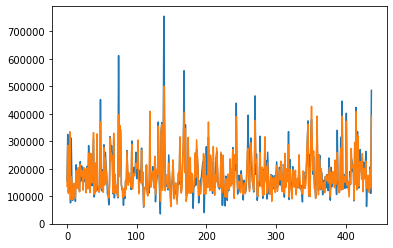

In [212]:
kn_score3 = regressor3.named_estimators_['kn'].score(X_test, y_test)
kn_predict3 = regressor3.named_estimators_['kn'].predict(X_test)
print('DecisionTree:',kn_score3)
plt.plot(pd.DataFrame(zip(y_test, dt_predict3), columns = ['y_test', 'pred']))

STACK: 0.85579394853488


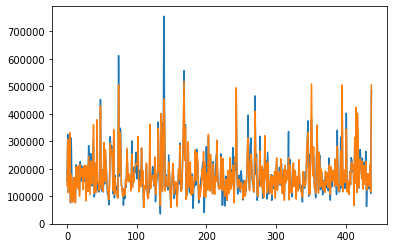

In [213]:
st_score3 = regressor3.score(X_test, y_test)
st_predict3 = regressor3.predict(X_test)
print('STACK:',st_score3)
plt.plot(pd.DataFrame(zip(y_test, st_predict3), columns = ['y_test', 'pred']))

In [214]:
#сравним результаты
print('STACK1(lr-dt-lr):', st_score1)
print('STACK2(kn-dt-kn):', st_score2)
print('STACK3(rf-kn-kn):', st_score3)
#МОдель №1 лучше из предложенных.

STACK1(lr-dt-lr): 0.8569818906791169
STACK2(kn-dt-kn): 0.8214329086054606
STACK3(rf-kn-kn): 0.85579394853488
